# Data Exploration of Bay Wheels System Dataset
## by Naomi Nemeth

## Investigation Overview 

In this project, we aimed to analyze the dataset from Bay Wheels to **understand or at least find some insights about the consumer behaviour in the bay area**. The Bay Wheels shares all the data from each ride in their website (you can find it here: https://www.lyft.com/bikes/bay-wheels/system-data ), for this project we are going to focus on the data from 2017's last semester. It's large amount of data almost 520k rows with 15 columns (variables). 

In order to achieve our goal, this analysis will be guided by the following points:
- When are most trips taken in terms of day of week?
- How long does the average trips takes? Does it changes over the weekday?
- Does the above depend on if a user is a subscriber or a customer? Do they have a different habit behaviour?

## Dataset Overview

 Dataset has a significant size 519700 rows and 15 columns. It doesn't have lots of null values, only on columns `member_birth_year`and `member_gender`. It has some tidiness and quality issues to be treated, but it nothing to messy.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_baywheel.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Number of rides by weekday

This graph makes show us that the weekdays that have more rides are: Tuesday, Wednesday and Thursday. What has had surprised me was the number of rides on weekends. I thought that most of the rides were made on weekends when people had more time to enjoy their free time. Two things come up: maybe people stay more time with bicycles on the weekend than on weekdays because they use it for leisure time and on the weekdays they use it for transportation, more quickly and in a functional way. So it can be a different habit by day use.

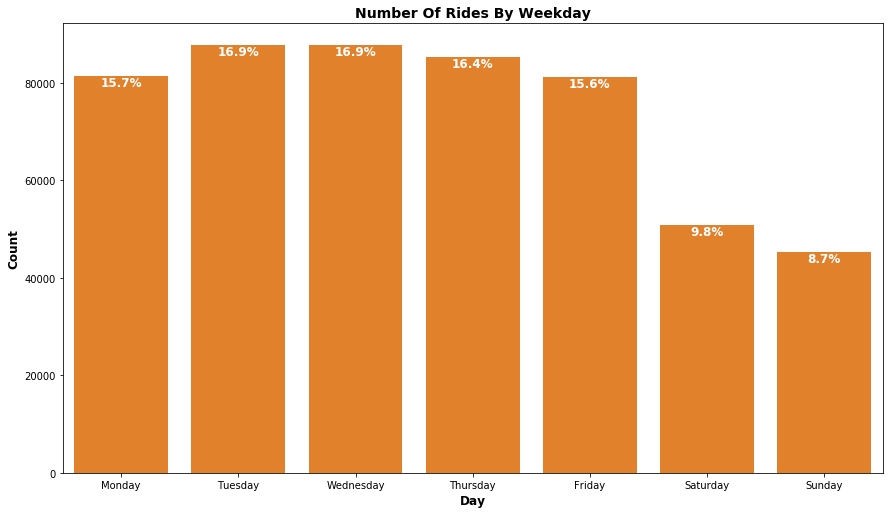

In [3]:
#--Set the same image size for all graphs
plt.figure(figsize=[14.70, 8.27])

week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered= True, categories = week_order)
df['dayofweek_start'] = df['dayofweek_start'].astype(ordered_cat)

base_color = sb.color_palette()[1]
sb.countplot(data = df, x='dayofweek_start', color = base_color)


n_points = df.shape[0]
cat_counts = df['dayofweek_start'].value_counts()
locs, labels = plt.xticks()


for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    plt.text(loc, count-8, pct_string, ha = 'center', va='top', color = 'w', weight = 'heavy', fontsize= 12);
    
# Add title and format it
plt.title('Number of rides by weekday'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Count'.title(),
               fontsize = 12, weight = "bold");

## Distribuition of rides duration

This visualization shows that the most of rides has a duration in a range of 5 to 20 minutes. It's unimodal graph. As the ride's duration time is wide: we have rides duration from seconds to almost a day long, we scaled it in order to have a better look in the distribuition of the rides.

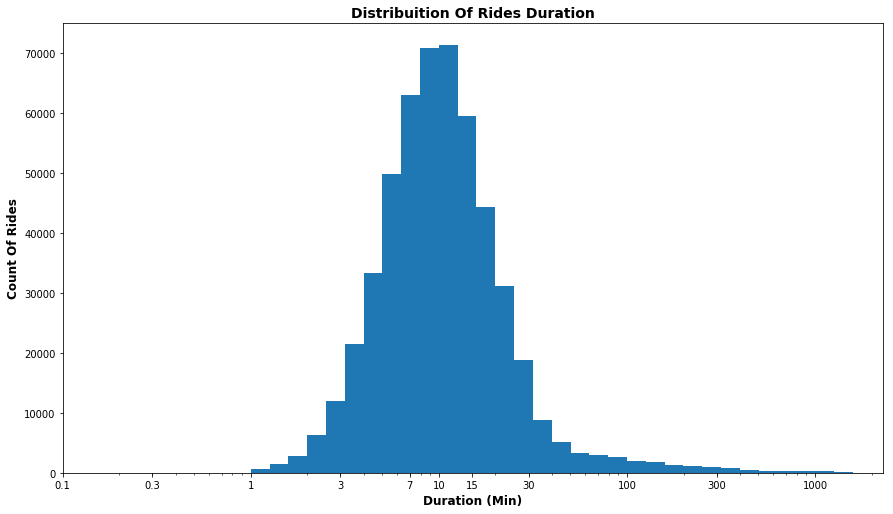

In [4]:
plt.figure(figsize=[14.70, 8.27])

bins = 10 ** np.arange(0,3.15+0.1,0.1)
ticks = [0.1,0.3,1,3,7,10,15,30,100,300,1000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);

# Add title and format it
plt.title("Distribuition of rides duration".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Duration (min)'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Count of rides'.title(),
               fontsize = 12, weight = "bold");

## Average ride duration by weekday

The ride's duration on the weekend is significantly larger than on weekdays. We can see that on weekdays the average duration is almost the same 15 to 17 minutes but on Saturday or Sunday, it rises for more than 26 minutes. So, ride's duration has a connection if the day is a week or a weekend. Next steps would be: does the type of user related to this? Which happens to be our third question.

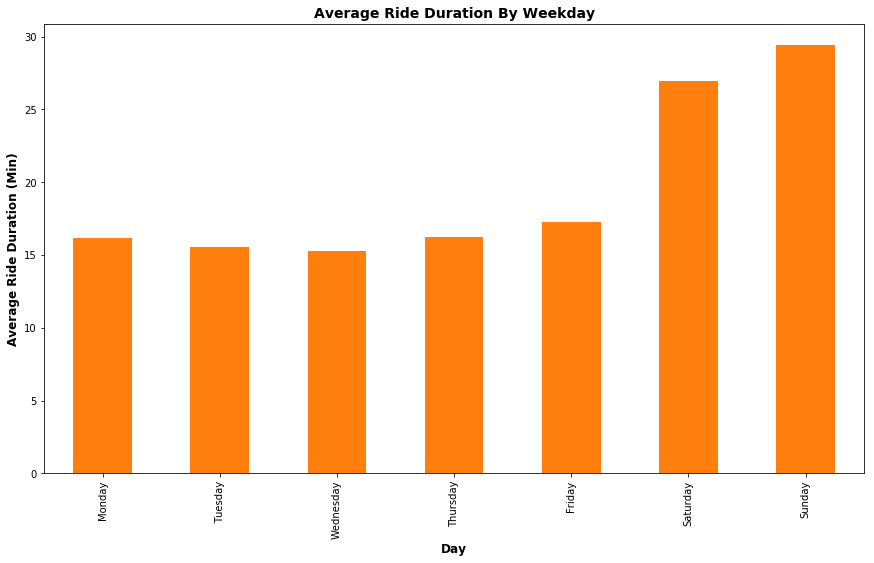

In [5]:
plt.figure(figsize=[14.70, 8.27])

week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered= True, categories = week_order)
df['dayofweek_start'] = df['dayofweek_start'].astype(ordered_cat)

base_color = sb.color_palette()[1]
df.groupby('dayofweek_start')['duration_min'].mean().plot(kind = "bar", color = base_color);

# Add title and format it
plt.title("Average ride duration by weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Average ride duration (min)'.title(),
               fontsize = 12, weight = "bold");

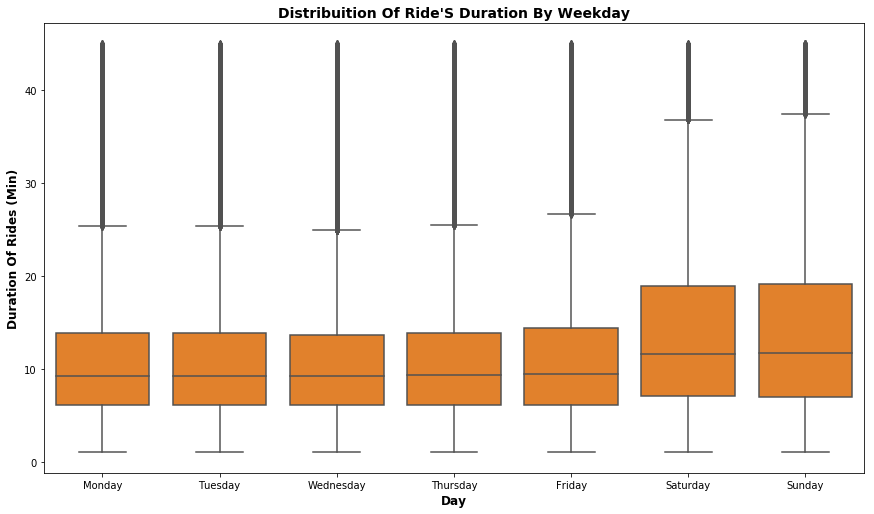

In [6]:
df_durationsub_45 = df.loc[df['duration_min'] <= 45]

plt.figure(figsize=[14.70, 8.27])

base_color = sb.color_palette()[1]

sb.boxplot(data = df_durationsub_45, x = 'dayofweek_start', y = 'duration_min',
              color = base_color);

# Add title and format it
plt.title("Distribuition of ride's duration by weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Duration of rides (min)'.title(),
               fontsize = 12, weight = "bold");

## Number of user type by weekday and Duration of rides by User Type

On this visualization, it is possible to observe that subscribers ride more on weekdays than on the weekend and customers ride more on the weekend, which can indicate that subscribers have different behaviour than consumers.
On the table, it's possible to affirm that the average of rides duration it's significantly different for subscribers and costumers.

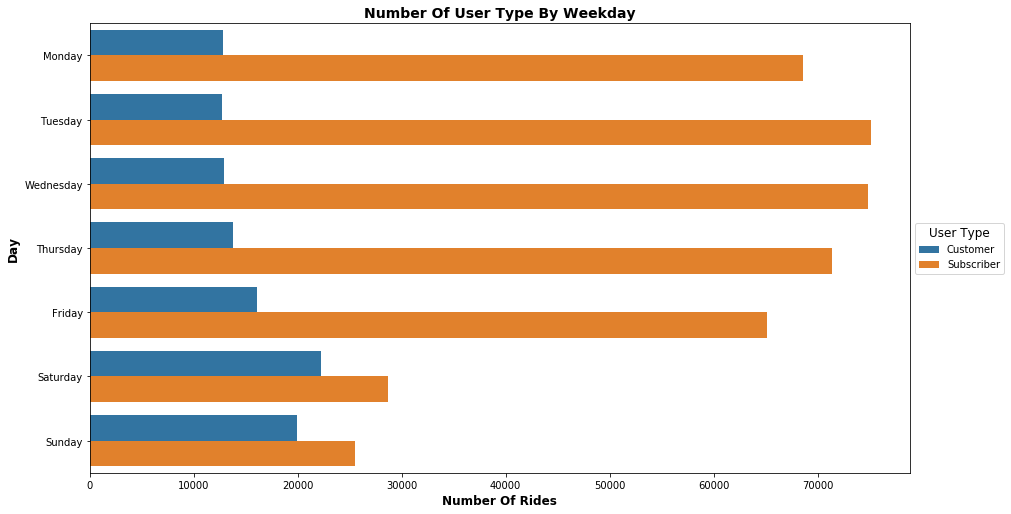

In [7]:
plt.figure(figsize=[14.70, 8.27])

sb.countplot(data = df, y='dayofweek_start', hue = 'user_type');
plt.xticks();

# Add title and format it
plt.title("Number of user type by weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Number of rides'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Day'.title(),
               fontsize = 12, weight = "bold")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="User Type", title_fontsize = 12);

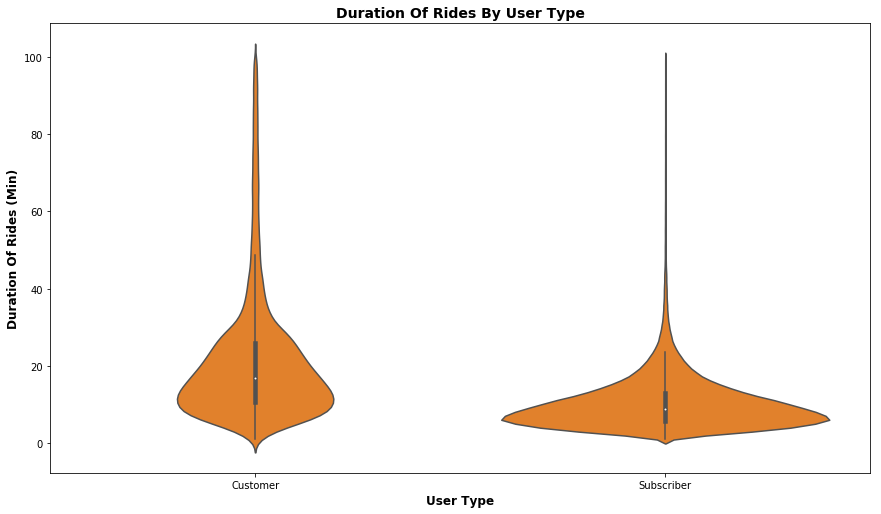

In [8]:
#--Most of rides 
df_durationsub_100 = df.loc[df['duration_min'] <= 100]

plt.figure(figsize=[14.70, 8.27])

base_color = sb.color_palette()[1]

sb.violinplot(data = df_durationsub_100, x = 'user_type', y = 'duration_min',
              color = base_color)

# Add title and format it
plt.title("Duration of Rides by User Type".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Duration of rides (min)'.title(),
               fontsize = 12, weight = "bold");

## Duration of rides by weekday and user type

Finally, in this Multivariate Visualization, we could put together: user type, duration of rides and weekdays. And now it's possible to affirm that customer and subscribers have very different behaviour. Subscribers use the Bay Wheels more frequently and on a weekday, it's part of his mobility journey and rides are faster. As for customers, they use Bay Wheels's bikes on the weekend, stays more time with it and use it to enjoy their free time.

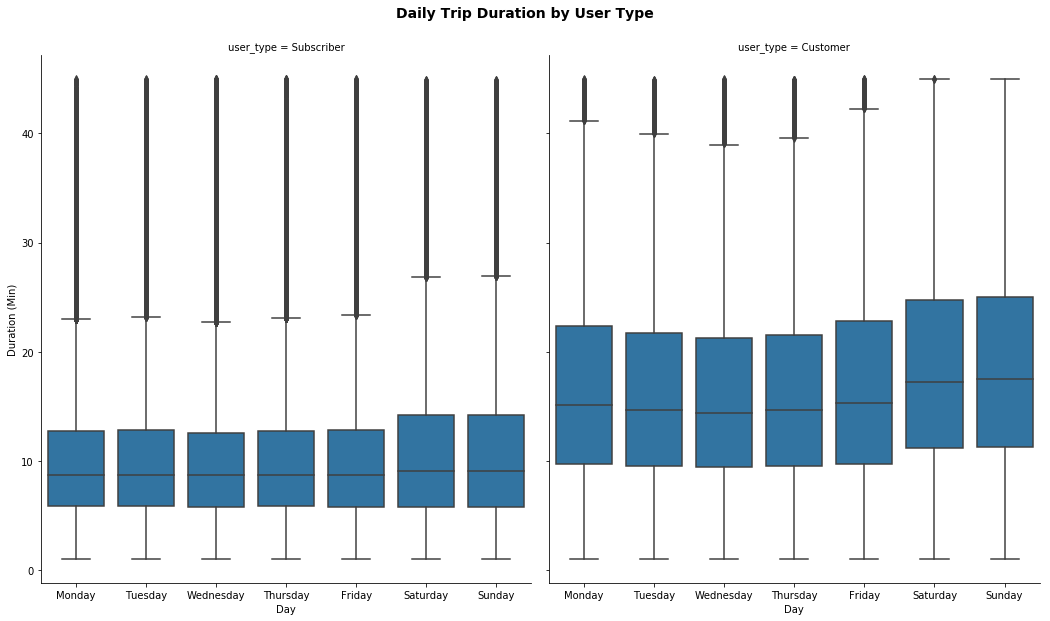

In [9]:
g = sb.FacetGrid(data = df_durationsub_45, col = 'user_type', height = 8.27, aspect = (14.70/2)/8.27)
g.map(sb.boxplot, 'dayofweek_start', 'duration_min');

plt.suptitle("Daily Trip Duration by User Type", y = 1.04, fontsize = 14, weight = 'bold')

g.set_axis_labels('Day', 'Duration (Min)');

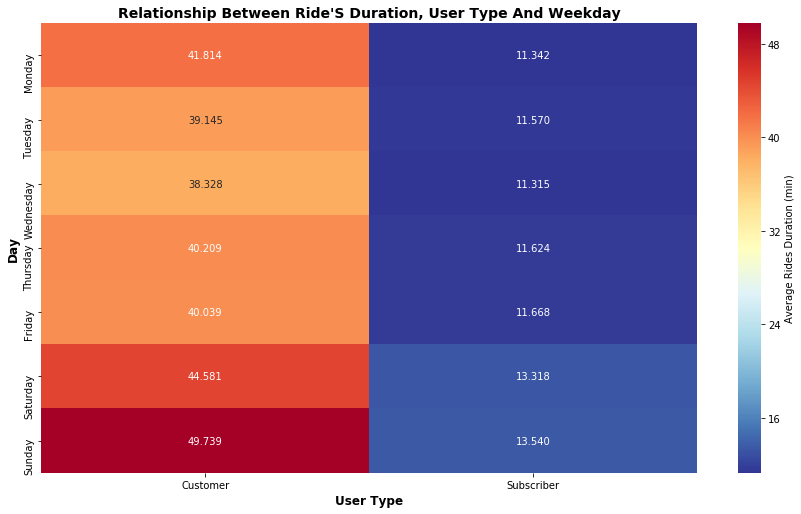

In [10]:
plt.figure(figsize=[14.70, 8.27])

#--Calculating the average of ride's duration
#--Transforming the data in a pivot table to plot the heatmap
cat_means = df.groupby(['user_type','dayofweek_start']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'dayofweek_start', columns = 'user_type', 
                            values = 'duration_min_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average Rides Duration (min)'}, cmap = 'RdYlBu_r')


# Add title and format it
plt.title("Relationship between ride's duration, user type and weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Day'.title(),
               fontsize = 12, weight = "bold");

## Conclusion

So by analyzing this dataset, we were able to find out two very different groups of users, which have distinct behaviour and needs. Bay Wheels should understand both of their user types and base their strategical decisions to fully attend their needs. 

In [11]:
 ! jupyter nbconvert slide_deck_nemeth.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_nemeth.ipynb to slides
[NbConvertApp] Writing 533122 bytes to slide_deck_nemeth.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\naomi\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 9, in <module>
    sys.exit(main())
  File "C:\Users\naomi\Anaconda3\lib\site-packages\jupyter_core\application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\naomi\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\naomi\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 338, in start
    self.convert_notebooks()
  File "C:\Users\naomi\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 508, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\